In [ ]:
## First create a virtual environment and activate it
%%bash
python3 -m venv ai4ph
source ai4ph/bin/activate

In [ ]:
# Install dependencies
%%bash
pip install matplotlib scikit-learn pandas numpy notebook


In [ ]:
# Freeze dependencies
%%bash
pip freeze > requirements.txt

## Download the Dataset
This dataset reports the daily reported number of deaths involving COVID-19 by fatality type.<br>
<br>
Data include:<br>

- Date on which the death occurred 
- Total number of deaths involving COVID-19
- Number of deaths with “COVID-19 as the underlying cause of death”
- Number of deaths with “COVID-19 contributed but not underlying cause”
- Number of deaths where the “Cause of death unknown” or “Cause of death missing”

In [10]:
# Custom python function to download and save to csv files
import urllib.request

def download_file(url, file_name):
    try:
        request = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        with urllib.request.urlopen(request) as response:
                if response.status == 200:
                    with open(file_name, "wb") as f:
                        f.write(response.read())
                        print(f"URL content written to '{file_name}' successfully.")
                else:
                 print(f"Failed to fetch URL. Status code: {response.status}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [17]:
# Download the dataset
url = "https://data.ontario.ca/dataset/c43fd28d-3288-4ad2-87f1-a95abac706b8/resource/3273c977-416f-407e-86d2-1e45a7261e7b/download/deaths_fatality_type.csv"
download_file(url, "covidData.csv")

URL content written to 'covidData.csv' successfully.


Let's start by importing the <em>pandas</em> and the <em>matplotlib</em> libraries.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
covid_data = pd.read_csv("covidData.csv")

In [19]:
covid_data.head()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
0,2020-04-01,16,11,2,3
1,2020-04-02,29,23,2,4
2,2020-04-03,21,14,2,5
3,2020-04-04,29,22,2,5
4,2020-04-05,28,19,3,6


So the first date in the dataset had 16 total deaths, with 11 of these caused by Covid primarily, 2 of these are listed as being caused by Covid secondarily and 3 have an unknown/missing cause.

In [28]:
# convert the date column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y-%m-%d')


#### Let's print out some summary statistics...


In [20]:
covid_data.shape

(1324, 5)

In [21]:
covid_data.describe()

,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
count,1324.000000,1324.000000,1324.000000,1324.000000
mean,12.874622,9.138973,2.983384,0.752266
std,14.510798,10.709044,3.360843,1.584301
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,0.000000
50%,8.000000,5.000000,2.000000,0.000000
75%,16.000000,11.000000,4.000000,1.000000
max,86.000000,67.000000,22.000000,13.000000


In [22]:
covid_data.isnull().sum()

date                     0
deaths_total             0
death_covid              0
death_covid_contrib      0
death_unknown_missing    0
dtype: int64

In [46]:
mean_total_deaths = covid_data['deaths_total'].mean()
std_death_covid = covid_data['death_covid'].std()

print(f"Mean of Total Deaths: {mean_total_deaths}")
print(f"Standard Deviation of Deaths Attributed to COVID-19: {std_death_covid}")

Mean of Total Deaths: 12.874622356495468
Standard Deviation of Deaths Attributed to COVID-19: 10.709043832469849


#### Let's visualize the data...


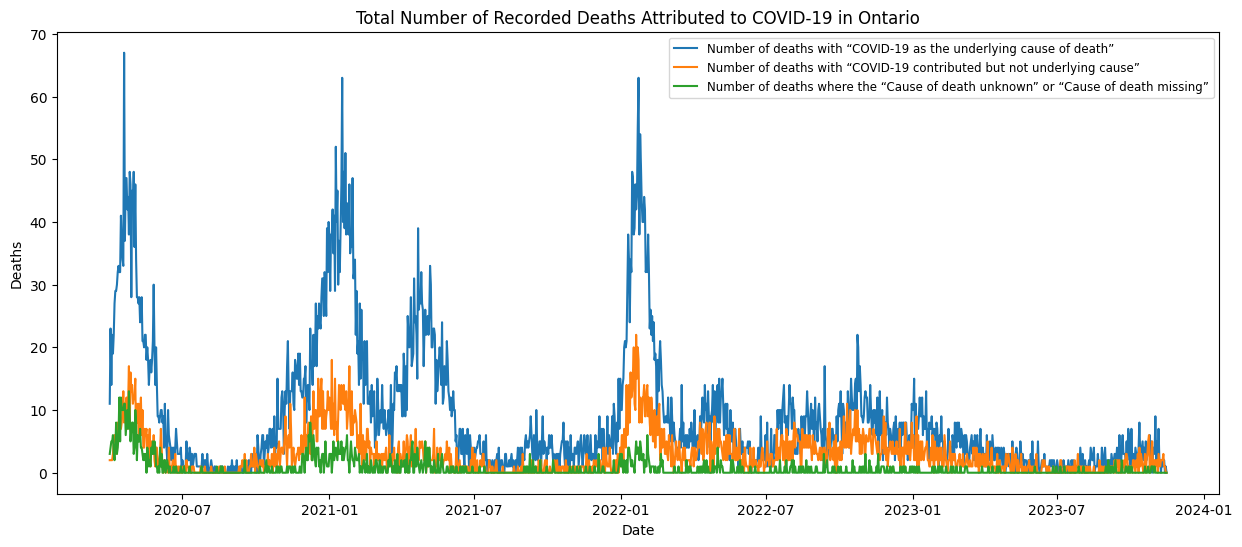

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(covid_data['date'], covid_data['death_covid'], label='Number of deaths with “COVID-19 as the underlying cause of death”')
plt.plot(covid_data['date'], covid_data['death_covid_contrib'], label='Number of deaths with “COVID-19 contributed but not underlying cause”')
plt.plot(covid_data['date'], covid_data['death_unknown_missing'], label='Number of deaths where the “Cause of death unknown” or “Cause of death missing”')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Total Number of Recorded Deaths Attributed to COVID-19 in Ontario')
plt.legend(fontsize=8.5)
plt.show()

## Deaths Involving COVID-19 by Fatality Type Data Analysis Summary

### Dataset Overview
This dataset contains the daily reported number of deaths involving COVID-19 by fatality type.
An initial inspection of the data was performed to understand its structure and content.

### Initial Observations
- The dataset includes 1324 records with several key columns like `date`, `death_covid`, `death_unknown_missing` and `death_covid_contrib` representing the date as well as the different type of fatalities recorded respectively.
- The data spans from April 1, 2020 - November 16, 2023, covering various phases of the pandemic.

### Data Cleaning
- Missing values were not observed in the dataset.
- The `date` column was converted to a datetime format for accurate time-series analysis.

### Summary Statistics
- **Mean Total Deaths**: The average of total number of deaths recorded in the dataset was calculated to be approximately 12.87, with min and max values between 0 and 86.
- **Standard Deviation of Total Deaths**: The standard deviation for total deaths attributed to covid as the primary cause was found to be 10.70.

### Data Visualization
A line chart representing total number of deaths involving COVID-19 cases over time was created:


### Observations from the Visualization
- There is a noticeable trend in the cases over the observed period.
- Significant peaks were observed around the end/beginning of the year.
- Further analysis could focus on the specific drivers/implications of these peaks.


